In [1]:
using Printf, DelimitedFiles
using Plots
using DataFrames
using Revise, MDToolbox

In [2]:
#using BSON: @save, @load
#@load "df.bson" df

In [3]:
using JLD2

df = load("df.jld2")["df"]

,fnames,score,omega,phi,prou
,Any,Any,Any,Any,Any
1,1/complex.1.pdb,1440.86,"[0.507987, 0.151721, -0.847897]",22.4984,"[190.083, 181.186, 146.302]"
2,1/complex.2.pdb,1355.91,"[-0.553359, -0.114757, -0.825]",177.56,"[60.9937, 152.925, -62.1826]"
3,1/complex.3.pdb,1313.06,"[-0.518066, -0.21407, -0.828119]",30.4902,"[29.3759, 111.855, -47.292]"
4,1/complex.4.pdb,1254.79,"[-0.45877, -0.0508539, -0.887099]",179.398,"[100.897, 174.065, -62.1583]"
5,1/complex.5.pdb,1204.77,"[0.572324, 0.059546, 0.817863]",163.204,"[59.0539, 171.36, -53.8009]"
6,1/complex.6.pdb,1198.03,"[-0.516551, 0.0168724, -0.85609]",165.107,"[86.4951, 194.415, -48.3581]"
7,1/complex.7.pdb,1197.43,"[-0.0204815, -0.485007, -0.87427]",17.3521,"[165.279, 34.529, -23.0272]"
8,1/complex.8.pdb,1196.01,"[-0.616462, -0.0343283, -0.786636]",164.788,"[45.6031, 179.582, -43.5745]"
9,1/complex.9.pdb,1186.36,"[0.0707632, 0.954084, 0.29106]",156.273,"[206.179, -51.9118, 120.038]"


In [4]:
sort!(df, [:score], rev=true);
#dfs = vcat(df, df)
#sort!(dfs, [:score], rev=true)

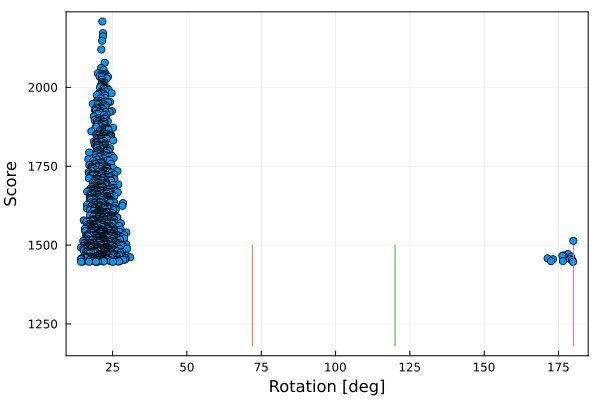

In [5]:
#pyplot()
plot(df.phi[1:1000], df.score[1:1000], seriestype=:scatter, dpi=250, label=nothing, box_style=:box)
xaxis!("Rotation [deg]"); yaxis!("Score")
#s = collect(970:1350)
s = collect(1180:1500)
plot!(fill(360/5, length(s)), s, label=nothing, dpi=250)
plot!(fill(360/3, length(s)), s, label=nothing, dpi=250)
plot!(fill(360/2, length(s)), s, label=nothing, dpi=150)

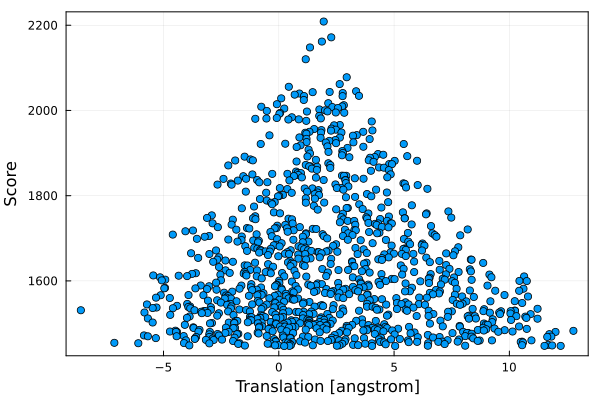

In [6]:
#pyplot()
plot(df.d[1:1000], df.score[1:1000], seriestype=:scatter, dpi=150, label=nothing, box_style=:box)
xaxis!("Translation [angstrom]"); yaxis!("Score")

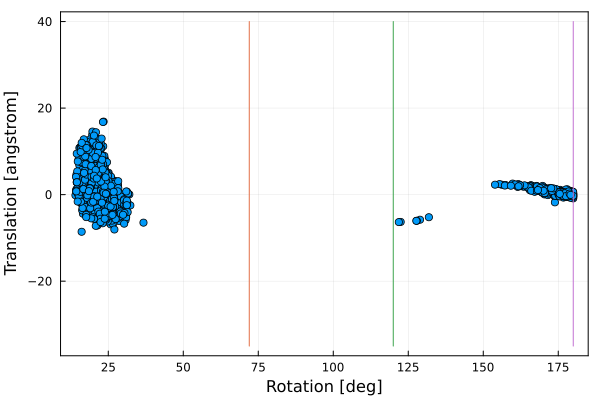

In [7]:
#pyplot()
plot(df.phi[1:2000], df.d[1:2000], seriestype=:scatter, dpi=150, label=nothing, box_style=:box)
xaxis!("Rotation [deg]"); yaxis!("Translation [angstrom]")
s = collect(-35:40)
plot!(fill(360/5, length(s)), s, label=nothing, dpi=250)
plot!(fill(360/3, length(s)), s, label=nothing, dpi=250)
plot!(fill(360/2, length(s)), s, label=nothing, dpi=150)

In [8]:
function create_heatmap(x, y, z, nx, ny)
    A = zeros(Float64, ny, nx)
    A .= -Inf64
    #edge_x = range(minimum(x), maximum(x), nx+1)
    edge_x = range(20, 190, nx+1)
    edge_y = range(minimum(y), maximum(y), ny+1)
    for ix in 1:nx
        for iy in 1:ny
            id_x = edge_x[ix] .<= x .< edge_x[ix+1]
            id_y = edge_y[iy] .<= y .< edge_y[iy+1]
            id = id_x .& id_y
            if !isempty(z[id])
                A[iy, ix] = maximum(z[id])
            end
        end
    end
    grid_x = edge_x[1:end-1] .+ (0.5 * (edge_x[2] - edge_x[1])) .+ (edge_x[2] - edge_x[1])
    grid_y = edge_y[1:end-1] .+ (0.5 * (edge_y[2] - edge_y[1])) .+ (edge_y[2] - edge_y[1])    
    return (z=A, x=grid_x, y=grid_y)
end

create_heatmap (generic function with 1 method)

In [ ]:
n = 100000
F = create_heatmap(df.phi[1:n], df.d[1:n], df.score[1:n], 50, 100)
p = plot(F.x, F.y, F.z, framestyle=:box, dpi=300, c=:viridis,  
     st=:contourf, levels=range(minimum(F.z[F.z .> -Inf]), maximum(F.z), 10), xlim)
xlabel!("Rotation [degree]")
ylabel!("Translation [Angstrom]")

In [ ]:
savefig(p, "heatmap_score.png")

In [ ]:
function create_heatmap_min(x, y, z, nx, ny)
    A = zeros(Float64, ny, nx)
    A .= -Inf64
    #edge_x = range(minimum(x), maximum(x), nx+1)
    edge_x = range(0, 190, nx+1)
    edge_y = range(minimum(y), maximum(y), ny+1)
    for ix in 1:nx
        for iy in 1:ny
            id_x = edge_x[ix] .<= x .< edge_x[ix+1]
            id_y = edge_y[iy] .<= y .< edge_y[iy+1]
            id = id_x .& id_y
            if !isempty(z[id])
                A[iy, ix] = minimum(z[id])
            end
        end
    end
    grid_x = edge_x[1:end-1] .+ (0.5 * (edge_x[2] - edge_x[1])) .+ (edge_x[2] - edge_x[1])
    grid_y = edge_y[1:end-1] .+ (0.5 * (edge_y[2] - edge_y[1])) .+ (edge_y[2] - edge_y[1])    
    return (z=A, x=grid_x, y=grid_y)
end

In [ ]:
using Combinatorics

function compute_rmsd_permute(ref, t, nmer)
    natom = Int(t.natom / nmer)
    nmer_ref = Int(ref.natom / natom)
    index_pairs = collect(permutations(1:nmer_ref, nmer))
    rmsd = Inf64
    for index in index_pairs
        id = Vector{Int}(undef, 0)
        for imer = 1:nmer
            id = [id; (natom*(index[imer]-1)+1):(natom * index[imer])]
        end
        ref2 = ref[:, id]
        t2 = superimpose(ref2, t)
        r = compute_rmsd(ref2, t2)
        if r[1] < rmsd
            rmsd = r[1]
        end
    end
    return rmsd
end

In [ ]:
t = mdload("ref.pdb")
t = t["atomname CA"]
ref = t[1, :]
for imer = 2:40
    ref = hcat(ref, t[imer, :])
end
ref

In [ ]:
function read_ascii(fname)
    lines = readlines(fname)
    natom = length(lines)
    xyz = zeros(Float64, 1, natom*3)
    for i = 1:natom
        xyz[1, 3*(i-1)+1] = parse(Float64, lines[i][31:38])
        xyz[1, 3*(i-1)+2] = parse(Float64, lines[i][39:46])
        xyz[1, 3*(i-1)+3] = parse(Float64, lines[i][47:54])
    end
    TrjArray(xyz=xyz)
end

In [ ]:
ntop = 10000
rmsd = zeros(Float64, ntop)
t = mdload("1/complex.1.pdb")
id = select_atom(t, "atomname CA")

for i in 1:ntop
    filename = df.fnames[i]
    t = read_ascii(filename)
    t_ca = t[:, id]
    rmsd[i] = compute_rmsd_permute(ref, t_ca, 2)
end

More than 50 iterations needed!

In [ ]:
F = create_heatmap_min(df.phi[1:ntop], df.d[1:ntop], rmsd[1:ntop], 50, 100)
p = plot(F.x, F.y, F.z, framestyle=:box, dpi=300, c=:hot,  
     st=:contourf, levels=range(0, 5, 10), xlim=(10, 180))
xlabel!("Rotation [degree]")
ylabel!("Translation [Angstrom]")

In [ ]:
savefig(p, "heatmap_rmsd.png")

In [ ]:
df.phi[1:ntop]

In [ ]:
using JLD2

save("rmsd.jld2", "rmsd", rmsd)

In [21]:
pwd()

"/data/yasu/capsid/6r7m_zdock_iter"